## Power balanced projection methods for time-continuous dynamic simulations

In [233]:
# Imports
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import rpm_module as rpm
import sympy as sp

import PH_models as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## RPM solver for PHS conservative systems

In [253]:
phs_struct = model.triangle.build_non_linear(1, 1)

In [265]:
#Solver parameters
p_order = 2
k_order  = 1
sr = 3
stepSize = 1/sr
quadOrder = 20
epsilon = 10**(-15)
maxIter = 100

In [266]:
solver = rpm.RPMSolverPHS(phs_struct, p_order, k_order, stepSize,
    quadOrder, epsilon, maxIter)

(100, 2)


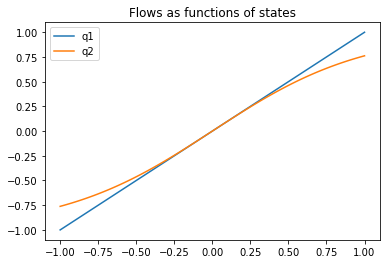

In [267]:
x = np.array([np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)]).T
rpm.hp.plot_gradients(solver, np.linspace(-1, 1, 100), ["q1", "q2", "phi"])

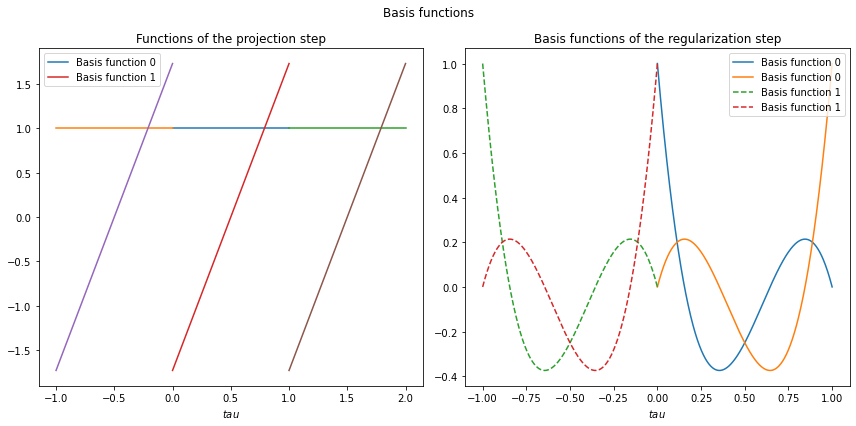

In [268]:
fig1 = rpm.hp.plot_basis(solver)

In [274]:
init = np.zeros(len(phs_struct["States"]), dtype= np.float64)
init[0] = 2
duration = 1000
t = np.linspace(0, duration, int(duration/stepSize))
x, dx_proj, l_mults, dx_regul = solver.simulate(init, duration)

KeyboardInterrupt: 

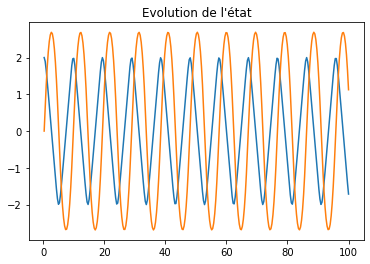

In [270]:
plt.figure()
plt.title("Evolution de l'état")
plt.plot(t[1:],x)

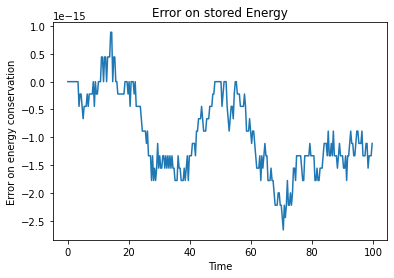

In [271]:
rpm.hp.plot_error_energy(solver, x, t)

In [272]:
#rpm.hp.plot_flows_trajectories(solver, dx_proj[0:100], dx_regul[0:100], N_points=50)

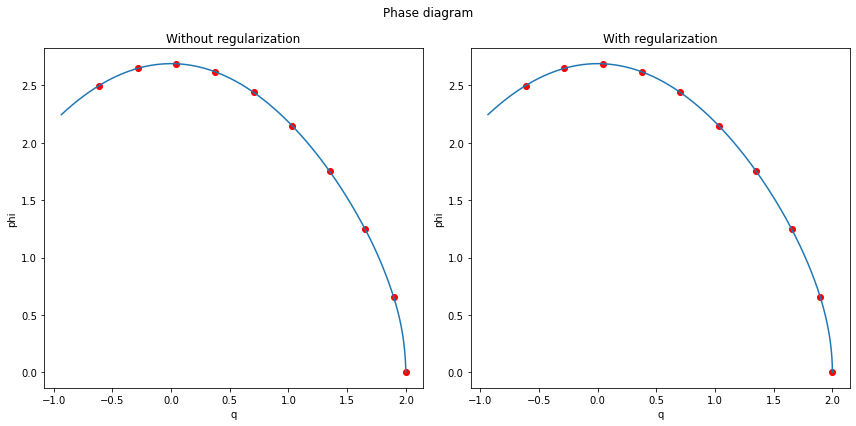

In [273]:
fig = rpm.hp.plot_phase_diagram_2D(solver, x[0:10], dx_proj[0:10], dx_regul[0:10], indexes=[0,1], N_points=50)

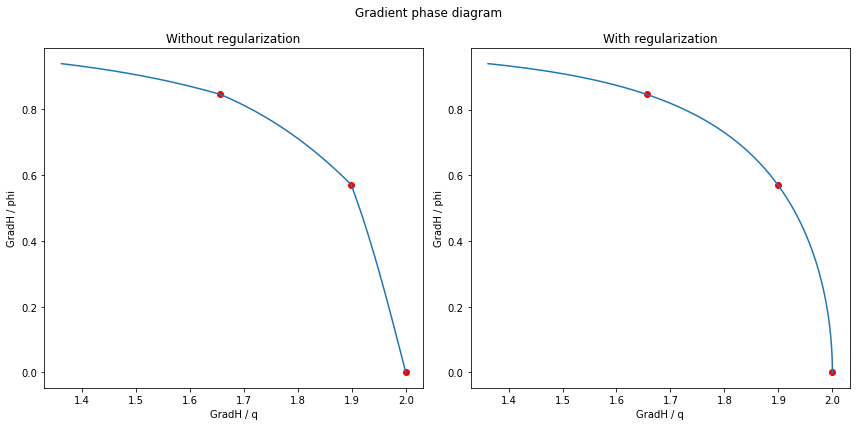

In [264]:
fig = rpm.hp.plot_gradients_phase(solver, x[0:3], dx_proj[0:3], dx_regul[0:3], indexes=[0,1], N_points=50)